## SFN 24 Analysis

### Imports

In [3]:
%load_ext autoreload
%autoreload 2

In [37]:
from imports import *

In [65]:
from models import *
from data import * 
from env import *
from harmonize import *
from metrics import * 
from sim import *

In [66]:
# overall imports
import importlib
import data

# data load
from data.data_load import load_transcriptome, load_connectome
importlib.reload(data.data_load)

# data utils
from data.data_utils import (
    reconstruct_connectome,
    reconstruct_upper_triangle,
    make_symmetric,
    expand_X_symmetric,
    expand_Y_symmetric,
    expand_X_symmetric_shared,
    expand_X_Y_symmetric_conn_only,
    expand_shared_matrices,
    expand_X_symmetric_w_conn, 
    process_cv_splits, 
    process_cv_splits_conn_only_model, 
    expanded_inner_folds_combined_plus_indices
)

import data.data_utils
importlib.reload(data.data_utils)

# cross-validation classes
import data.cv_split
from data.cv_split import RandomCVSplit, SchaeferCVSplit, CommunityCVSplit, SubnetworkCVSplit
importlib.reload(data.cv_split)

# prebuilt model classes
import models.prebuilt_models
from models.prebuilt_models import ModelBuild
importlib.reload(models.prebuilt_models)

# metric classes
import metrics.distance_FC
import metrics.eval
from metrics.eval import ModelEvaluator
from metrics.eval import pearson_numpy, mse_numpy, r2_numpy, pearson_cupy, mse_cupy, r2_cupy
importlib.reload(metrics.eval)

# sim class
import sim.sim 
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
import sim.multi_sim_run
from sim.sim import Simulation
from sim.multi_sim_run import multi_sim_run, single_sim_run, open_pickled_results, combine_results
importlib.reload(sim.sim)
importlib.reload(sim.sim_utils)
importlib.reload(sim.multi_sim_run)

import sim.plot
from sim.plot import (
    plot_predictions, 
    barplot_model_performance,
    boxplot_model_performance,
    plot_predictions_with_metrics,
    plot_best_params_table, plot_best_parameters_table_colored, 
    violin_plot_model_performance, 
    plot_transcriptome_performance_bar, plot_connectome_performance_bar, 
    plot_combined_performance_bar
)

importlib.reload(sim.plot)


<module 'sim.plot' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/plot.py'>

#### Check job specs

In [58]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.showUtilization()


CPU Usage: 7.1%
RAM Usage: 7.2%
Available RAM: 349.8G
Total RAM: 377.1G
52.4G
GPU found 0
XGBoost version: 2.0.3
cupy version: 13.1.0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


## Table of Contents
- [AHBA+HCP](#AHBA)
    - [PLS Baselines](#PLS-Sims)
      - [Random Splits](#PLS-Random-Splits)
    - [XGBoost](#XGBoost-Sims)
      - [Random Splits](#XGBoost-Random-Splits)
- [GTEx+HCP](#GTEx)
- [UTSW+HCP](#UTSW)

### PLS <a id="PLS-Sims"></a>

#### 4-Fold Random split

In [44]:
full_pls_random_shared_sim_results = multi_sim_run('random',
                                                'pls',
                                                use_gpu=False, 
                                                use_shared_regions=False, 
                                                test_shared_regions=False, 
                                                save_sim=True,
                                                search_method='grid'
                                                )


Number of components explaining 95% of the variance: 34

 Test fold num: 1
(7140, 170) (7140,) (812, 170) (812,)
2
3
4
Fitting 1 folds for each of 12 candidates, totalling 12 fits
[CV] END max_iter=1000, n_components=1, scale=True, tol=1e-07; total time=   0.0s[CV] END max_iter=1000, n_components=1, scale=False, tol=1e-07; total time=   0.1s
[CV] END max_iter=1000, n_components=3, scale=False, tol=1e-07; total time=   0.1s

[CV] END max_iter=1000, n_components=5, scale=True, tol=1e-07; total time=   0.1s
[CV] END max_iter=1000, n_components=3, scale=True, tol=1e-07; total time=   0.2s
[CV] END max_iter=1000, n_components=5, scale=False, tol=1e-07; total time=   0.1s
[CV] END max_iter=1000, n_components=7, scale=False, tol=1e-07; total time=   0.1s
[CV] END max_iter=1000, n_components=7, scale=True, tol=1e-07; total time=   0.1s
[CV] END max_iter=1000, n_components=9, scale=False, tol=1e-07; total time=   0.1s
[CV] END max_iter=1000, n_components=9, scale=True, tol=1e-07; total time=   

In [47]:
multi_sim_random_pls = open_pickled_results('multi_sim_random_pls.pickle')

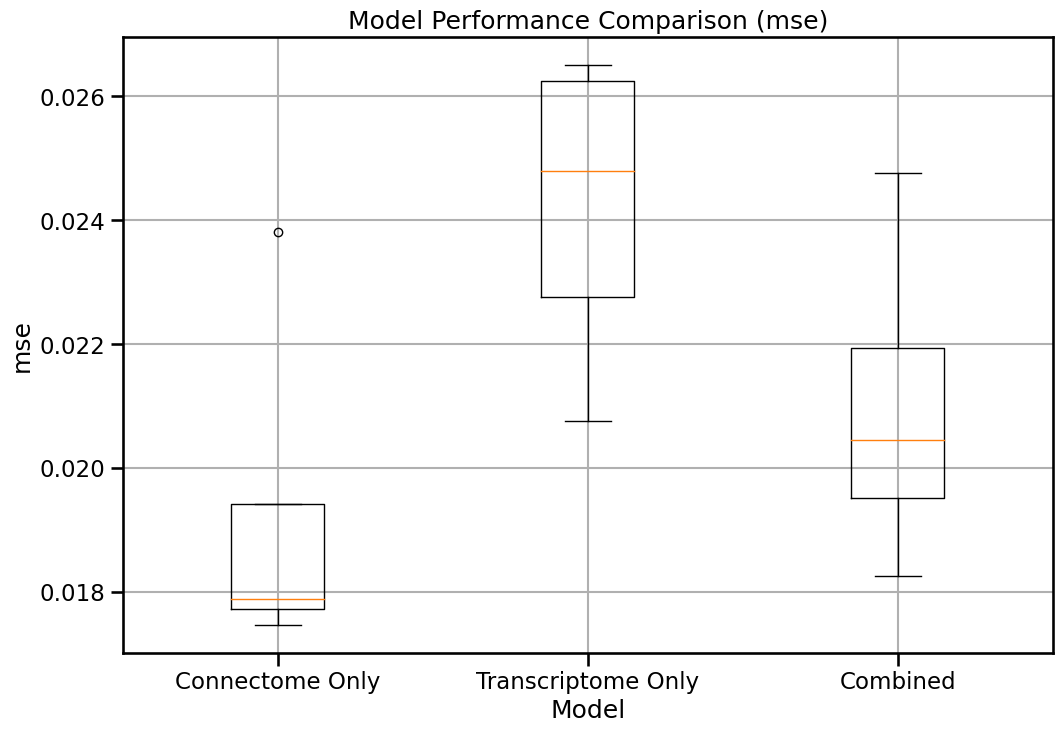

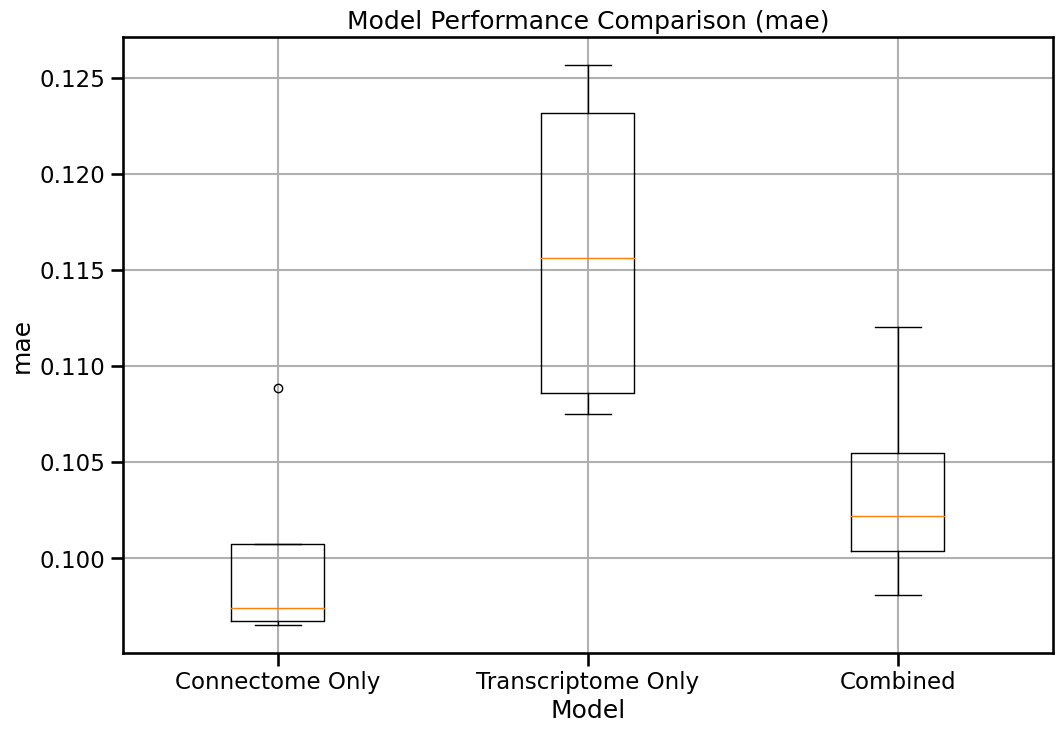

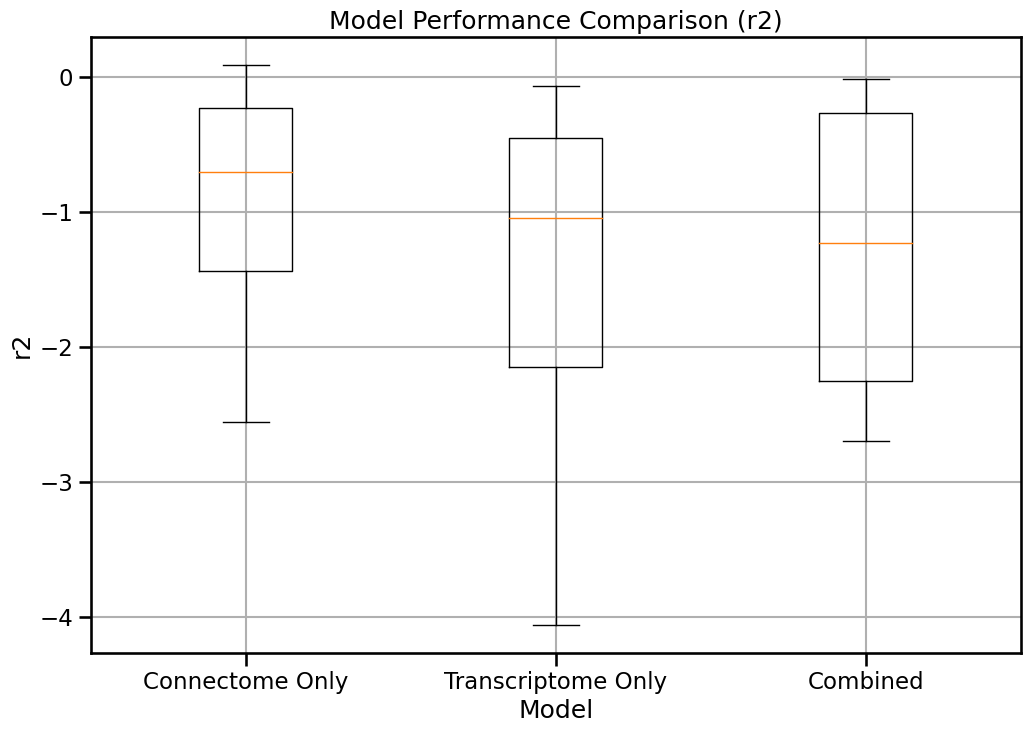

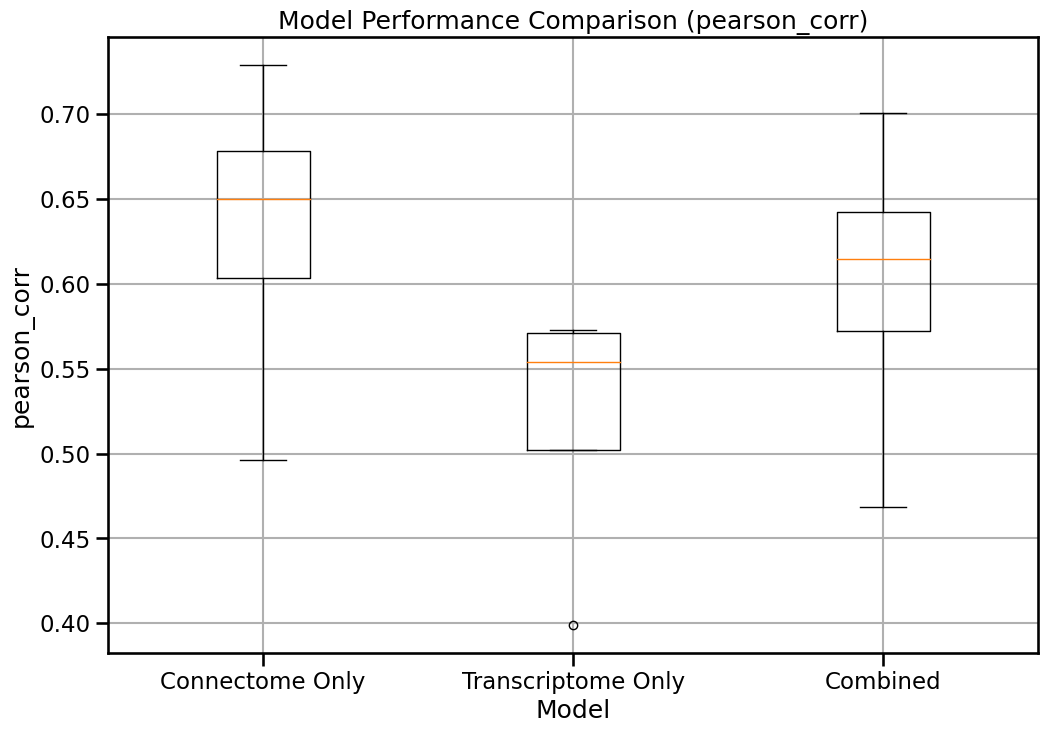

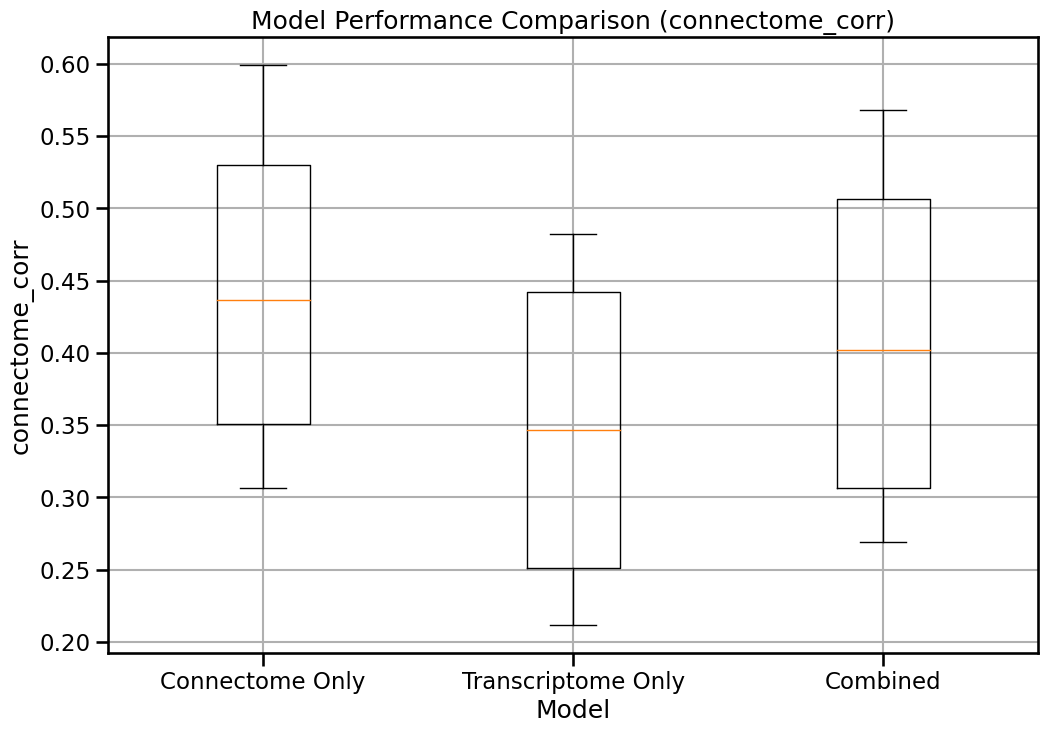

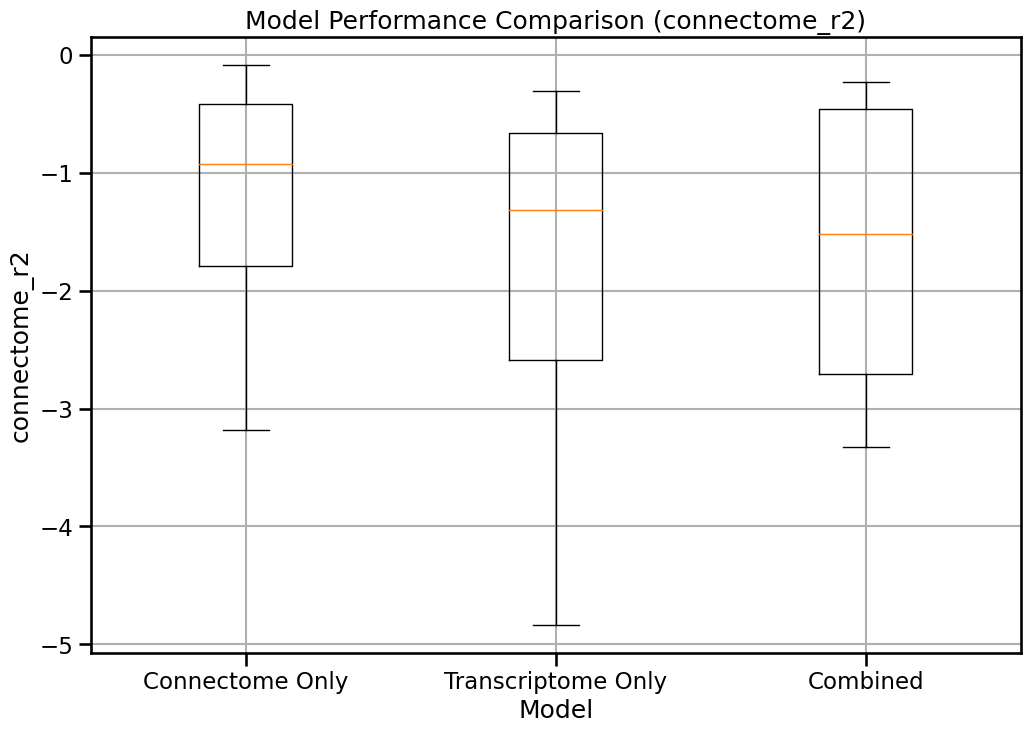

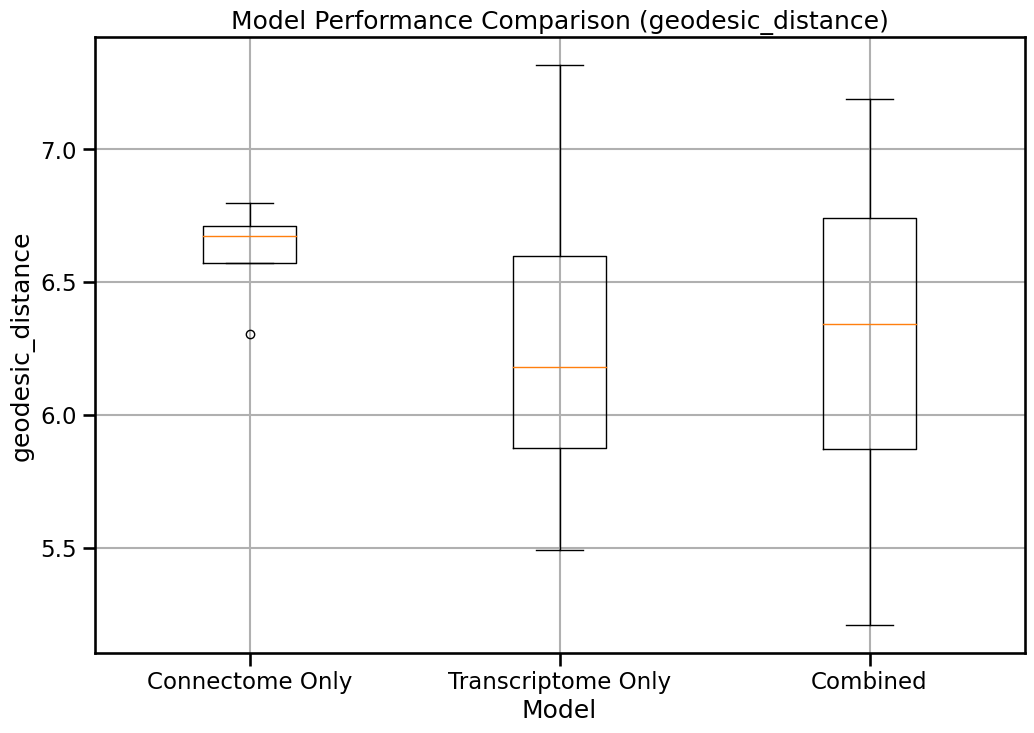

In [56]:
boxplot_model_performance(multi_sim_random_pls)

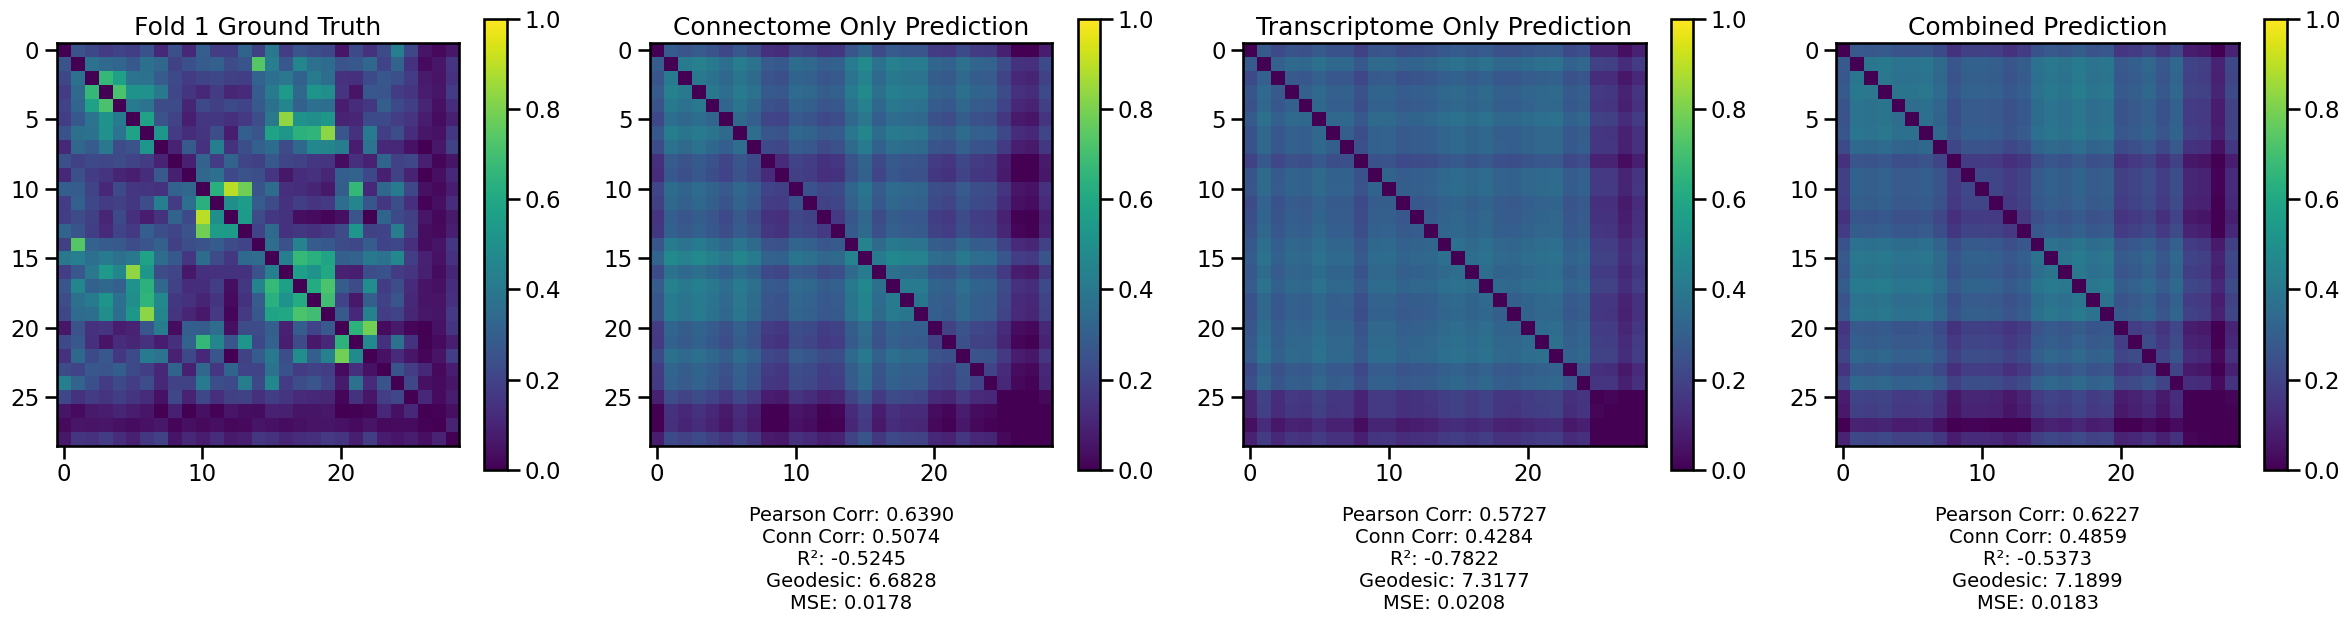

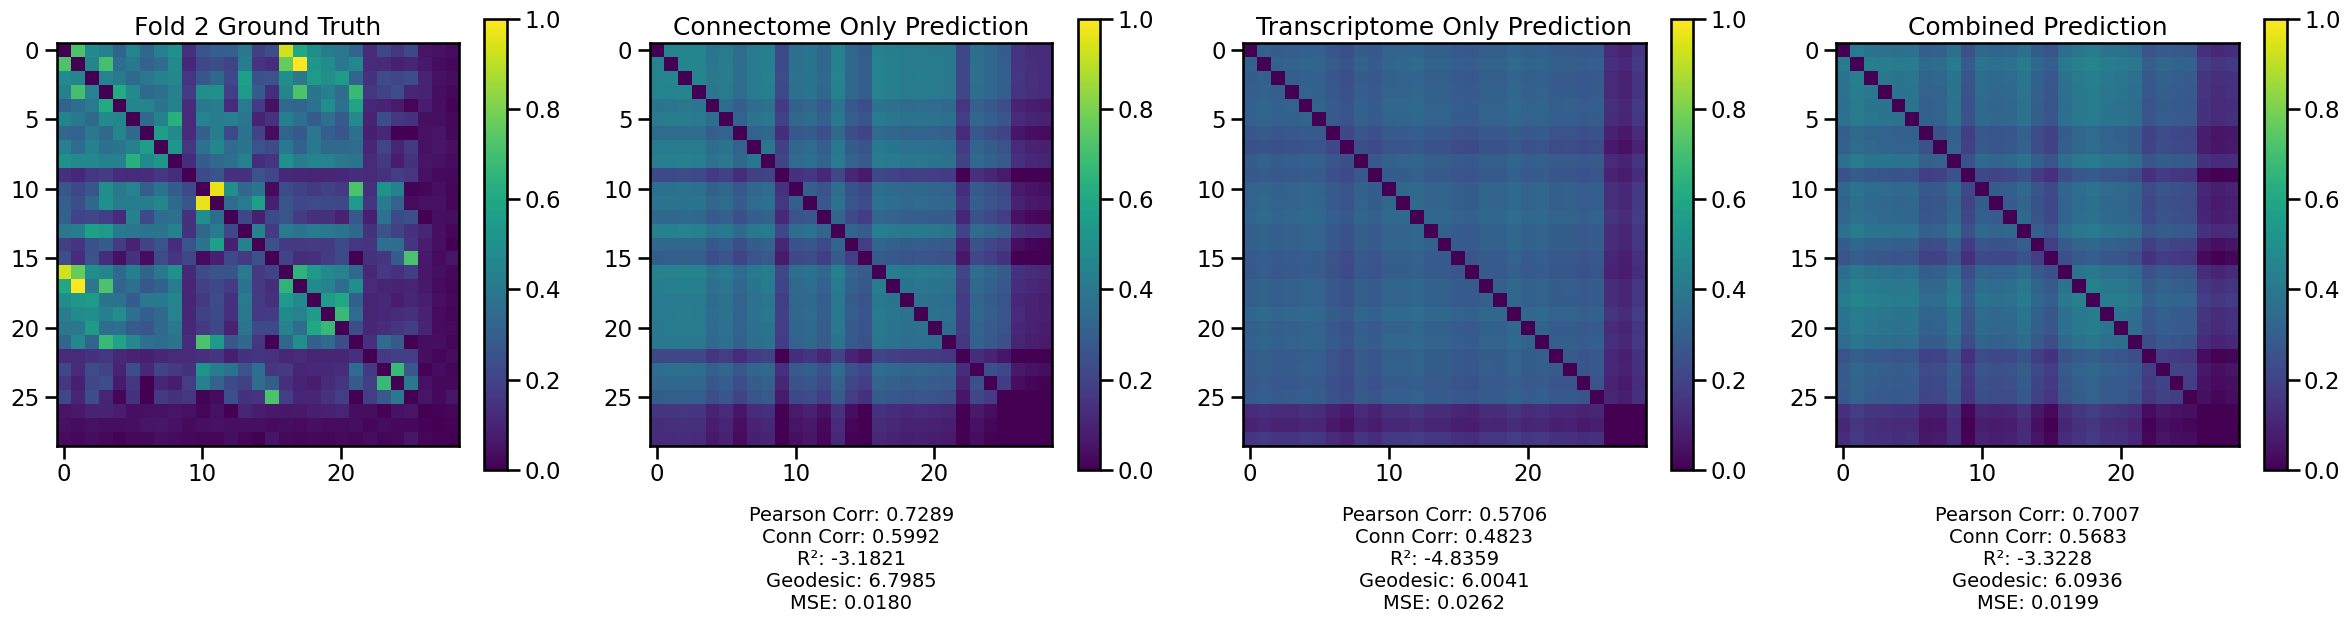

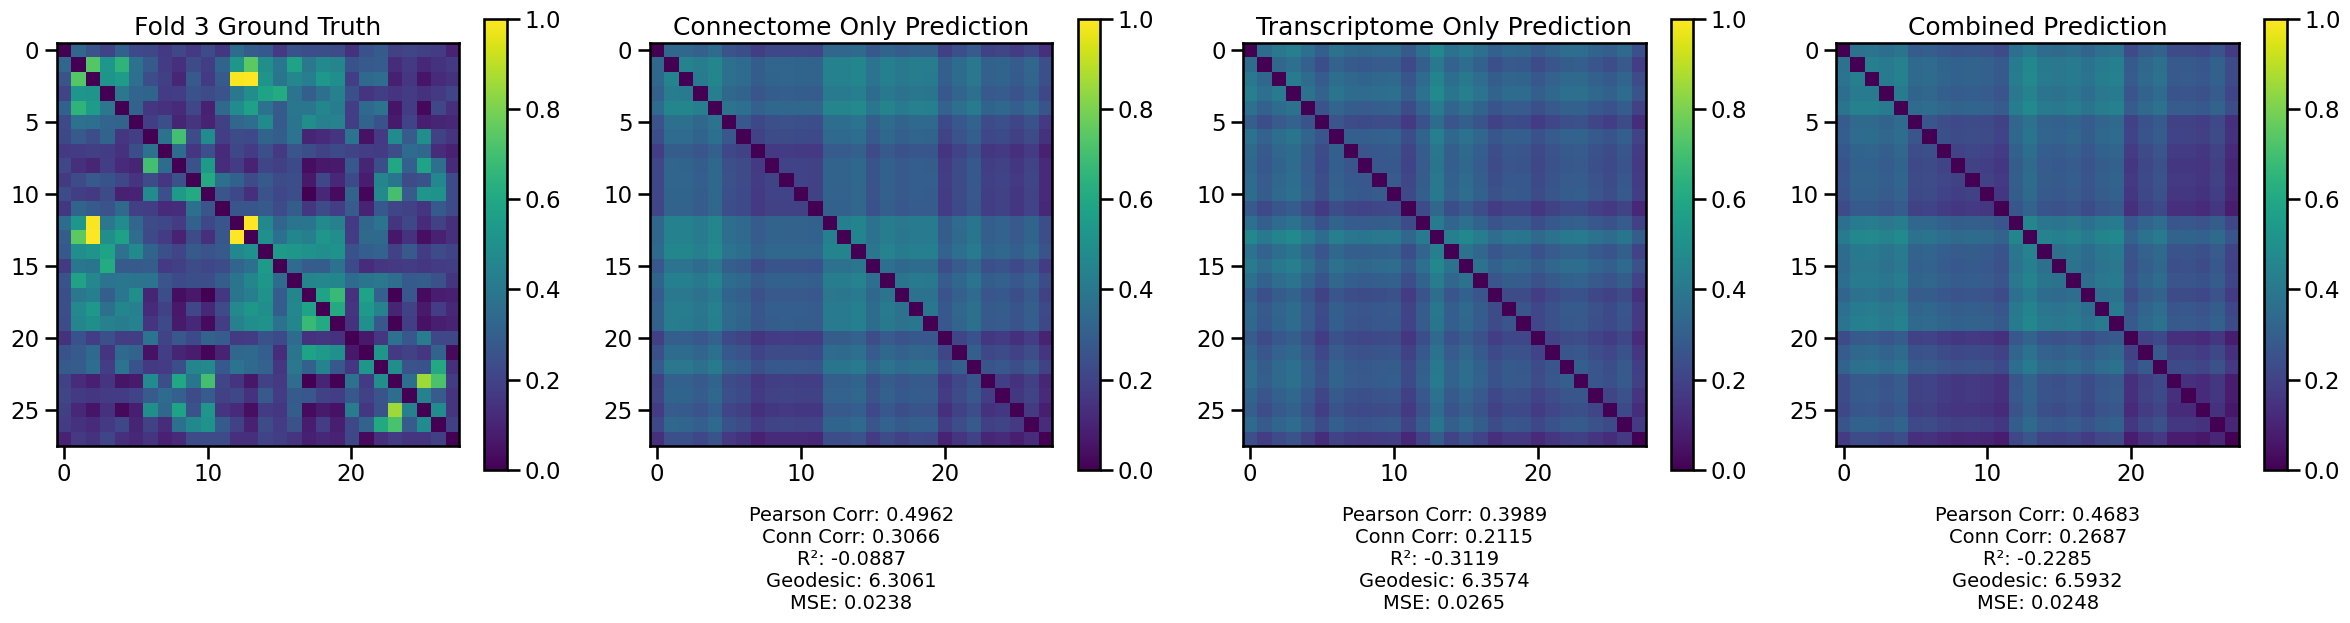

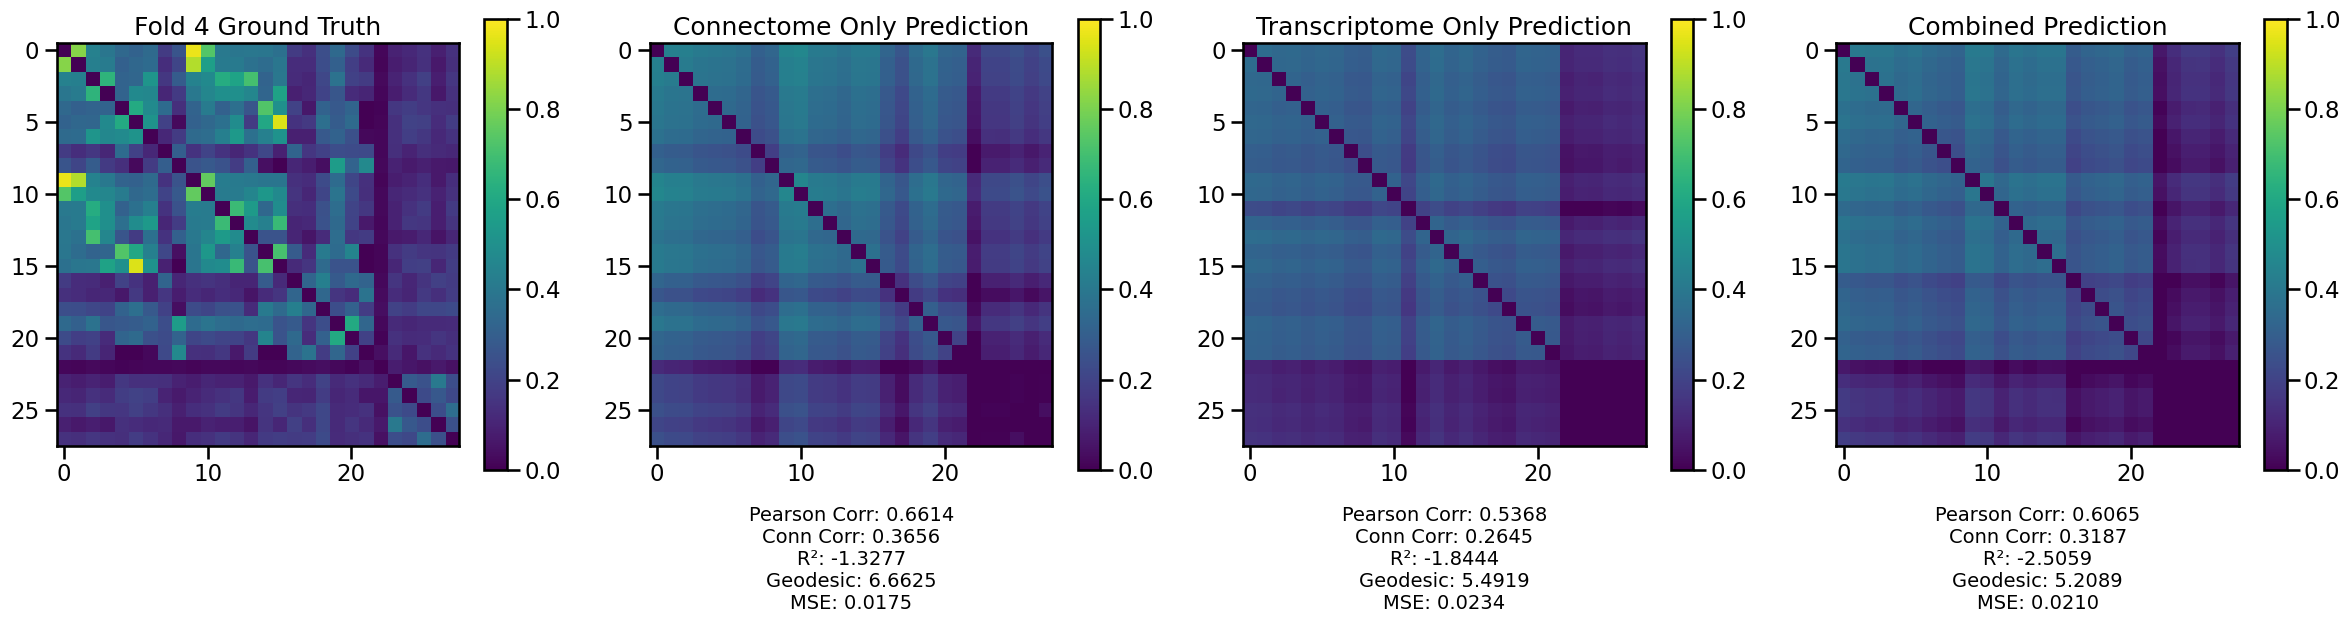

In [57]:
plot_predictions_with_metrics(multi_sim_random_pls)

### XGBoost <a id="XGBoost-Sims"></a>

#### 4-Fold Random split

Random split, trained on non-shared regions, test on non-shared

In [ ]:
full_xgb_random_nonshared_sim_results = multi_sim_run('random',
                                              'xgboost',
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False, 
                                              save_sim=True,
                                              search_method='random'
                                              )

Number of components explaining 95% of the variance: 34

 Test fold num: 1
(7140, 170) (7140,) (812, 170) (812,)
2
3
4
Fitting 1 folds for each of 100 candidates, totalling 100 fits
[CV 1/1] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=5, n_estimators=250, random_state=42, reg_alpha=0, reg_lambda=0, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=-0.007 total time=   3.0s
[CV 1/1] END colsample_bytree=1, device=cuda, learning_rate=0.1, max_depth=2, n_estimators=350, random_state=42, reg_alpha=1, reg_lambda=0, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=-0.008 total time=   0.2s
[CV 1/1] END colsample_bytree=0.8, device=cuda, learning_rate=0.1, max_depth=4, n_estimators=150, random_state=42, reg_alpha=0.1, reg_lambda=0, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=-0.007 total time=   0.2s
[CV 1/1] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=2, n_estimators=250, random_state=42, reg_alpha=0.1, reg_lambda=0,

Functions to combine single sim results

In [86]:
# File names
conn_file = 'single_sim_conn_schaefer_xgboost_useshared_testshared.pickle'
trans_file = 'single_sim_trans_schaefer_xgboost_useshared_testshared.pickle'
transconn_file = 'single_sim_transplusconn_schaefer_xgboost_useshared_testshared.pickle'
output_file = 'multi_sim_schaefer_xgboost_useshared_testshared_combined.pickle'

# Combine the results
combine_results(conn_file, trans_file, transconn_file, output_file)

Combined results saved to ./sim_results/multi_sim_schaefer_xgboost_useshared_testshared_combined.pickle
